A/B simple test for normal distribution

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data_A = np.random.normal(loc=10, scale=5, size=1000)  #mean = 10 , std = 5
 
data_B = np.random.normal(loc=12, scale=5, size=1000)  #mean = 12 , std = 5

In [4]:
# Создаем DataFrame для анализа
df = pd.DataFrame({
    'group': ['A'] * len(data_A) + ['B'] * len(data_B),
    'metric': np.concatenate([data_A, data_B])
})

df.head()

,group,metric
0,A,7.459459
1,A,8.375927
2,A,7.156107
3,A,7.638949
4,A,10.773682


In [5]:
group_A = df[df['group'] == 'A']['metric']
group_B = df[df['group'] == 'B']['metric']

In [6]:
group_A

0       7.459459
1       8.375927
2       7.156107
3       7.638949
4      10.773682
         ...    
995     8.101552
996    11.736560
997     8.824617
998     5.173863
999    15.224465
Name: metric, Length: 1000, dtype: float64

In [7]:
t_stat, p_value = stats.ttest_ind(group_A, group_B)

In [8]:
print(f'T-Statistic: {t_stat}')
print(f'P-value: {p_value}')

T-Statistic: -10.510784307989992
P-value: 3.452783929739075e-25


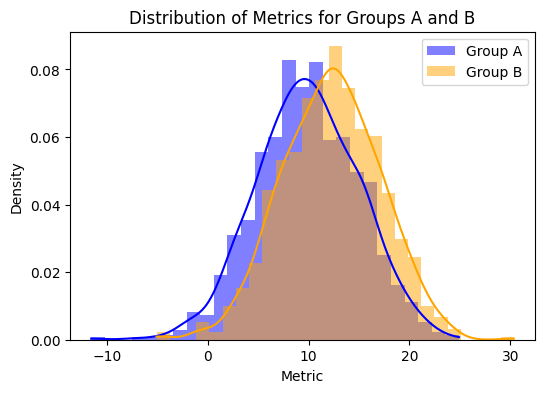

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(group_A, color='blue', label='Group A', kde=True, stat="density", linewidth=0)
sns.histplot(group_B, color='orange', label='Group B', kde=True, stat="density", linewidth=0)
plt.legend()
plt.title('Distribution of Metrics for Groups A and B')
plt.xlabel('Metric')
plt.ylabel('Density')
plt.show()


The difference between the groups is statistically significant. We reject the null hypothesis

A/B test for not normally distributed data

In [13]:
data_A = np.random.exponential(scale=10, size=1000) 
data_B = np.random.exponential(scale=12, size=1000)

In [15]:
df = pd.DataFrame({
    'group': ['A'] * len(data_A) + ['B'] * len(data_B),
    'metric': np.concatenate([data_A, data_B])
})
df.head()

,group,metric
0,A,2.174109
1,A,6.590399
2,A,6.710064
3,A,0.937681
4,A,11.452435


In [16]:
group_A = df[df['group'] == 'A']['metric']
group_B = df[df['group'] == 'B']['metric']

In [17]:
u_stat, p_value = stats.mannwhitneyu(group_A, group_B)


In [18]:
print(f'U-Statistic: {u_stat}')
print(f'P-value: {p_value}')

U-Statistic: 464196.0
P-value: 0.005560460167719587


C:\Users\User\AppData\Local\Temp\ipykernel_12072\2486122145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='metric', data=df, palette="Set2")


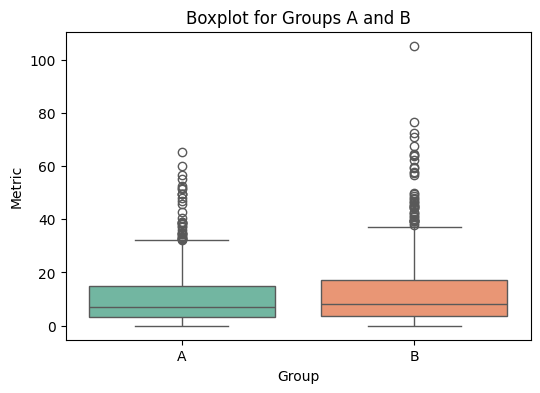

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='group', y='metric', data=df, palette="Set2")
plt.title('Boxplot for Groups A and B')
plt.xlabel('Group')
plt.ylabel('Metric')
plt.show()


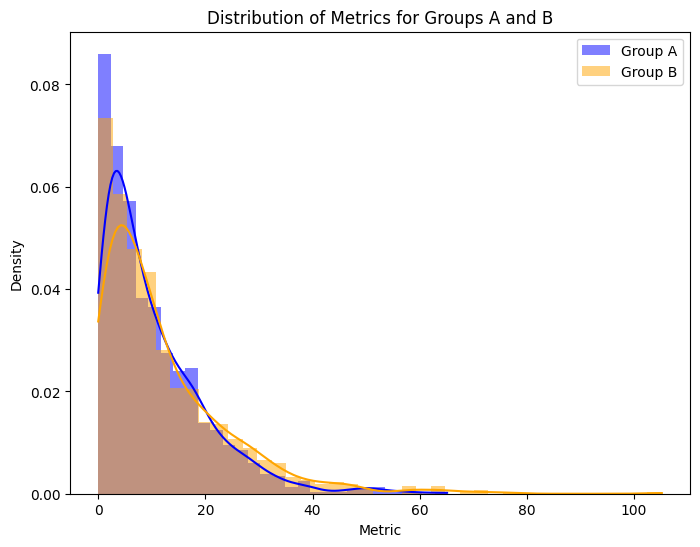

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(group_A, color='blue', label='Group A', kde=True, stat="density", linewidth=0)
sns.histplot(group_B, color='orange', label='Group B', kde=True, stat="density", linewidth=0)
plt.legend()
plt.title('Distribution of Metrics for Groups A and B')
plt.xlabel('Metric')
plt.ylabel('Density')
plt.show()